In [45]:
from urllib.parse import unquote
import numpy as np
import pandas as pd
from pathlib import Path
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
links_path = Path("./data/wikispeedia_paths-and-graph/links.tsv").resolve()
assert links_path.is_file()
links = pd.read_csv(links_path, sep="\t", header=None, names=["from", "to"],skiprows=11, skip_blank_lines=True)



In [47]:
DATA_PATH = Path.cwd() / "data/wikispeedia_paths-and-graph/"
shortest_path = (DATA_PATH / "shortest-path-distance-matrix.txt").resolve()
assert shortest_path.is_file()
shortest_path = np.loadtxt(shortest_path, dtype=str)

In [48]:
def convert_to_matrix(data):
    """Replaces each row (string) with the integer values of the string and replaces _ with NaN"""
    data = np.array([[int(i) if i != "_" else np.nan for i in row] for row in data])
    return data

In [49]:
shortest_path_graph = convert_to_matrix(shortest_path)
shortest_path_graph.shape

(4604, 4604)

In [50]:
links = links.map(lambda x: unquote(x))
links.head()

,from,to
0,Áedán_mac_Gabráin,Bede
1,Áedán_mac_Gabráin,Columba
2,Áedán_mac_Gabráin,Dál_Riata
3,Áedán_mac_Gabráin,Great_Britain
4,Áedán_mac_Gabráin,Ireland


In [51]:
# create a directed graph
G = nx.DiGraph()
G.add_edges_from(links.values)
print(G)

DiGraph with 4592 nodes and 119882 edges


In [60]:
degree = dict(G.degree(G.nodes()))
nx.set_node_attributes(G, degree, "degree")
links["degree"] = links["from"].map(degree)

In [52]:
# compute local clustering coefficient for each node
clustering = nx.clustering(G)
links["clustering"] = links["from"].map(clustering)

In [66]:
links["degree"].sort_values(ascending=False)

112482    1845
112531    1845
112514    1845
112515    1845
112516    1845
          ... 
104821       1
103865       1
5322         1
116823       1
52707        1
Name: degree, Length: 119882, dtype: int64

In [58]:
density = nx.density(G)
print(f"Graph density : {density}")

Graph density : 0.005686496910710776


<Axes: xlabel='clustering', ylabel='Count'>

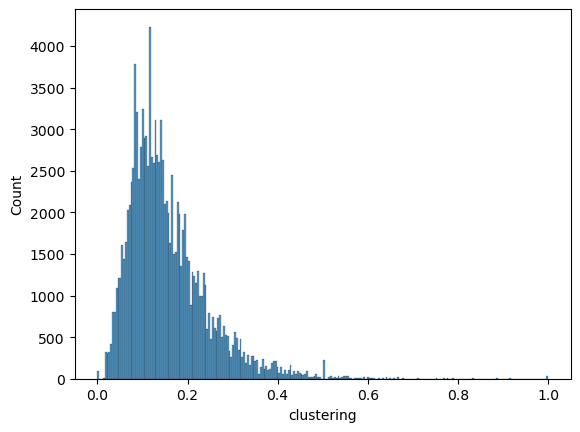

In [53]:
sns.histplot(data=links, x="clustering")
plt.show()

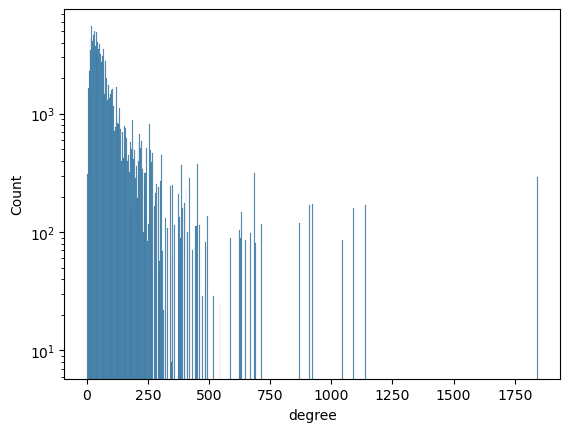

In [71]:
sns.histplot(data=links, x="degree")
plt.yscale('log')
plt.show()

In [78]:
links.sort_values(by="degree", ascending=False).drop_duplicates("degree").head(20)[["from", "degree"]]

,from,degree
112482,United_States,1845
112104,United_Kingdom,1140
37426,Europe,1092
40736,France,1044
35851,England,923
44088,Germany,912
118410,World_War_II,870
36110,English_language,716
54208,India,692
3461,Africa,689


In [57]:
G_undirected = G.to_undirected()
# omega = nx.algorithms.smallworld.omega(G_undirected)
sigma = nx.algorithms.smallworld.sigma(G_undirected)
print(
    # omega, 
    sigma
    )

KeyboardInterrupt: 